In [1]:
#Dataset obtained from https://www.kaggle.com/datasets/yasserh/walmart-dataset
#Thank you M Yasser H for the dataset

In [2]:
import pandas as pd
sales = pd.read_csv("walmartsales.csv")

In [3]:
#Check for duplicates
duplicates = sales.duplicated().any()
print(duplicates)

False


In [4]:
#Check for NaN values
isna = sales.isna().any()
print(isna)

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool


In [5]:
#Sum of NaN values
isna = sales.isna().sum()
print(isna)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


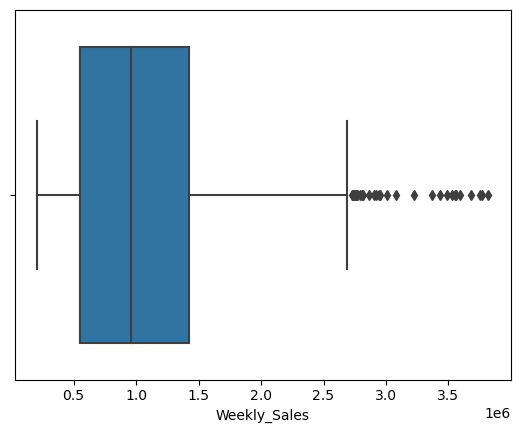

In [6]:
#Check for outliers
from pandasql import sqldf
query = "SELECT Store, Date, Weekly_Sales from sales"
rawdata = sqldf(query)
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=rawdata, x='Weekly_Sales')
plt.show()

In [7]:
#Summary statistics
rawdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.00,12.000,23.00,34.00,45.00
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.25,553350.105,960746.04,1420158.66,3818686.45


In [8]:
#Creating a function to check for outliers
def outliers(rawdata):
    q1 = rawdata.quantile(0.25)
    q3 = rawdata.quantile(0.75)
    IQR = q3 - q1
    outliers = rawdata[(rawdata<(q1-1.5*IQR)) | (rawdata>(q3+1.5*IQR))]
    return outliers

In [9]:
#Checking for outliers and the total number of outliers
y = outliers(rawdata['Weekly_Sales'])
print(len(y))
print(y)

34
189     3436007.68
241     3224369.80
471     2789469.45
474     2740057.14
475     3526713.39
523     3004702.33
526     2771397.17
527     3676388.98
761     2727575.18
1329    2939946.38
1332    2811646.85
1333    3749057.69
1381    2950198.64
1385    3487986.89
1758    2766400.05
1761    2771646.81
1762    3595903.20
1810    2864170.61
1813    2760346.71
1814    3556766.03
1901    2921709.71
1904    2762861.41
1905    3818686.45
1957    3369068.99
2759    2811634.04
2761    2752122.08
2762    2819193.17
2763    3766687.43
2811    2906233.25
2814    2762816.65
2815    3555371.03
3192    2734277.10
3764    3078162.08
3816    2739019.75
Name: Weekly_Sales, dtype: float64


In [10]:
#Creating another function to remove outliers from our dataset
def dropoutliers(rawdata):
    q1 = rawdata.quantile(0.25)
    q3 = rawdata.quantile(0.75)
    IQR = q3 - q1
    dropoutliers = rawdata[~((rawdata<(q1-1.5*IQR)) | (rawdata>(q3+1.5*IQR)))]
    return dropoutliers

In [11]:
#Removing outliers
data1 = dropoutliers(rawdata)
print(data1)

      Store        Date  Weekly_Sales
0         1  05-02-2010    1643690.90
1         1  12-02-2010    1641957.44
2         1  19-02-2010    1611968.17
3         1  26-02-2010    1409727.59
4         1  05-03-2010    1554806.68
...     ...         ...           ...
6430     45  28-09-2012     713173.95
6431     45  05-10-2012     733455.07
6432     45  12-10-2012     734464.36
6433     45  19-10-2012     718125.53
6434     45  26-10-2012     760281.43

[6435 rows x 3 columns]


/var/folders/f5/gfbd60tn7mldmd0mrjqw54sh0000gn/T/ipykernel_1997/2140010507.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dropoutliers = rawdata[~((rawdata<(q1-1.5*IQR)) | (rawdata>(q3+1.5*IQR)))]


In [12]:
#Thanks to ERIC KLEPPEN from https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/ for the guide

In [15]:
#Categorical encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

data1['Date'] = pd.to_datetime(data1['Date'])
data1['year'] = data1['Date'].dt.year
data1['month'] = data1['Date'].dt.month
data1['day'] = data1['Date'].dt.day
encoder = OrdinalEncoder()
encoded_date = encoder.fit_transform(data1[['year', 'month', 'day']])
data1[['year', 'month', 'day']] = encoded_date

encoder2 = LabelEncoder()
data1['Sales'] = encoder2.fit_transform(data1['Weekly_Sales']).astype(np.float32)
data1['store'] = encoder2.fit_transform(data1['Store'])
print(data1)

      Store       Date  Weekly_Sales  year  month   day   Sales  store
0         1 2010-05-02    1643690.90   0.0    4.0   1.0  5364.0      0
1         1 2010-12-02    1641957.44   0.0   11.0   1.0  5360.0      0
2         1 2010-02-19    1611968.17   0.0    1.0  18.0  5297.0      0
3         1 2010-02-26    1409727.59   0.0    1.0  25.0  4784.0      0
4         1 2010-05-03    1554806.68   0.0    4.0   2.0  5190.0      0
...     ...        ...           ...   ...    ...   ...     ...    ...
6430     45 2012-09-28     713173.95   2.0    8.0  27.0  2284.0     44
6431     45 2012-05-10     733455.07   2.0    4.0   9.0  2360.0     44
6432     45 2012-12-10     734464.36   2.0   11.0   9.0  2365.0     44
6433     45 2012-10-19     718125.53   2.0    9.0  18.0  2307.0     44
6434     45 2012-10-26     760281.43   2.0    9.0  25.0  2434.0     44

[6435 rows x 8 columns]


In [16]:
#Preparing data (X, y)
X = np.concatenate((data1[['store']].values, data1[['year', 'month', 'day']].values), axis=1)
y = data1['Sales']

In [17]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
#Ensemble Model
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
ada.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
ada_pred = ada.predict(X_test)
ensemble_pred = (rf_pred + ada_pred)/2

In [19]:
y_test = y_test.reset_index(drop=True)
ensemble_pred = pd.Series(ensemble_pred)
ensemble_pred = ensemble_pred.reset_index(drop=True)
result = pd.DataFrame({'Store': data1['store'], 'Date': data1['Date'], 'Weekly_Sales': y_test, 'ensemble_pred': ensemble_pred}).dropna()
print(result)

      Store       Date  Weekly_Sales  ensemble_pred
0         0 2010-05-02        3853.0    3954.075965
1         0 2010-12-02        4374.0    4098.091214
2         0 2010-02-19        5553.0    4668.053479
3         0 2010-02-26        3667.0    3603.486106
4         0 2010-05-03         838.0    1523.275350
...     ...        ...           ...            ...
1282      8 2012-09-28        5024.0    4292.737990
1283      8 2012-05-10        2561.0    2001.198876
1284      8 2012-12-10        2870.0    2035.607304
1285      8 2012-10-19        6146.0    4907.789231
1286      8 2012-10-26        2611.0    3200.266330

[1287 rows x 4 columns]


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, ensemble_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test,ensemble_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, ensemble_pred)
print(r2)

MAE: 712.2611636143926
MSE: 677396.1472141591
RMSE: 823.0407931652958
0.8087295201669801
